<a href="https://colab.research.google.com/github/carolinehagood/visualization/blob/main/02_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Pick something else on Craigslist: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of EDA you'd do with it. I look at used cars below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/jwa?purveyor=owner#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

2. Get your search results of interest and extract data from them, using code similar to what's below.

In [ ]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")
print(listings)

[<li class="cl-static-search-result" title="Vintage jewelry">
<a href="https://charlottesville.craigslist.org/jwl/d/greenwood-vintage-jewelry/7789804329.html">
<div class="title">Vintage jewelry</div>
<div class="details">
<div class="price">$1</div>
<div class="location">
                        Crozet
                    </div>
</div>
</a>
</li>, <li class="cl-static-search-result" title="&gt; LADIES RING - AMETHYST, DIAMONDS &amp; 10K GOLD, Vintage Piece &lt;">
<a href="https://charlottesville.craigslist.org/jwl/d/charlottesville-ladies-ring-amethyst/7788963272.html">
<div class="title">&gt; LADIES RING - AMETHYST, DIAMONDS &amp; 10K GOLD, Vintage Piece &lt;</div>
<div class="details">
<div class="price">$0</div>
<div class="location">
                        Charlottesville
                    </div>
</div>
</a>
</li>, <li class="cl-static-search-result" title="Musical Jewelry Box">
<a href="https://charlottesville.craigslist.org/jwl/d/troy-musical-jewelry-box/7783136098.html">
<di

In [ ]:
import re

categories = ['earrings', 'necklace', 'bracelet', 'watch', 'ring', 'pendant']
data = []

for k in range( len(listings) ):
  title = listings[k].find('div',class_='title').get_text().lower()
  price = listings[k].find('div',class_='price').get_text()
  link = listings[k].find(href=True)['href']
  words = title.split()
  hits = [word for word in words if word in categories]
  if len(hits) == 0:
        category = 'missing'
  else:
        category = hits[0]
  data.append({'title':title,'price':price,'link':link,'category':category})


3. Wrangle your data, do some EDA, and make some plots. Try to find some interesting relationships or stories to tell about your data.

In [ ]:
df = pd.DataFrame.from_dict(data)

df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')

print(df.shape)
df.head(2)

(23, 4)


,title,price,link,category
0,vintage jewelry,1,https://charlottesville.craigslist.org/jwl/d/g...,missing
1,"> ladies ring - amethyst, diamonds & 10k gold,...",0,https://charlottesville.craigslist.org/jwl/d/c...,ring


count      23.000000
mean       98.217391
std       262.566521
min         0.000000
25%         5.000000
50%        15.000000
75%        37.500000
max      1200.000000
Name: price, dtype: float64


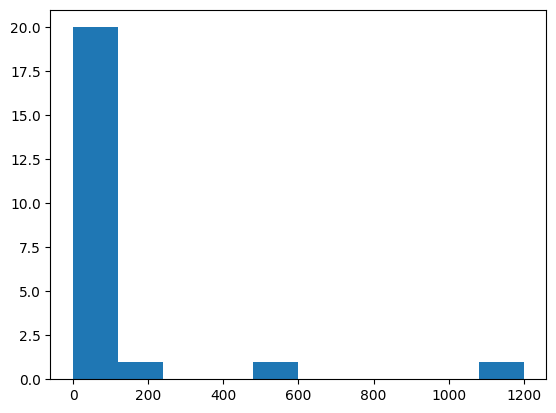

In [ ]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

In [ ]:
df.loc[:,['price','category']].groupby('category').describe()

price                                                         
         count   mean         std    min     25%    50%     75%     max
category                                                               
earrings   2.0   35.0    7.071068   30.0   32.50   35.0   37.50    40.0
missing   15.0  121.6  324.092756    1.0    3.00   10.0   17.50  1200.0
pendant    2.0   22.5   10.606602   15.0   18.75   22.5   26.25    30.0
ring       2.0   22.5   31.819805    0.0   11.25   22.5   33.75    45.0
watch      2.0  137.5   53.033009  100.0  118.75  137.5  156.25   175.0

**I was not able to pull data on another numerical dimension of data, so I could not create more plots in comparison with the price data